<center><u><H1>AdaBoost</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load the data

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

## Preprocessing the data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2019)

In [4]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Creating models

In [5]:
rf = RandomForestClassifier(n_estimators=1000)

In [6]:
rf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [9]:
dt = dt.fit(X_train_std, y_train)

In [10]:
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000, learning_rate=0.05, random_state=2019)

In [11]:
ada = ada.fit(X_train_std, y_train)

## Metrics:

In [12]:
dt_pred = dt.predict(X_test_std)
rf_pred = rf.predict(X_test_std)
ada_pred = ada.predict(X_test_std)

In [13]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.3f}")

Decision Tree Accuracy: 0.978


In [14]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.3f}")

Random Forest Accuracy: 0.978


In [15]:
print(f"AdaBoost Accuracy: {accuracy_score(y_test, ada_pred):.3f}")

AdaBoost Accuracy: 0.978


## Plotting data

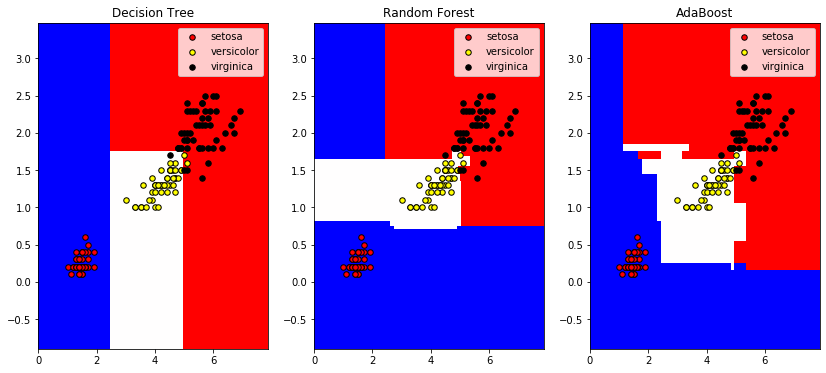

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6))
n_classes = len(np.unique(y))
plot_colors = ["red","yellow","black"]

res = 0.02
X2D = iris.data[:, [2, 3]]

x1min, x1max = X2D[:,0].min() -1, X2D[:,0].max() + 1
x2min, x2max = X2D[:,1].min() -1, X2D[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

for clf, ax, title in zip([dt, rf, ada], axs, ['Decision Tree','Random Forest','AdaBoost']):
    clf.fit(X2D, y)
    output = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    ax.pcolormesh(xx1,xx2, output, cmap=plt.cm.bwr)
    ax.set_title(title)  
    
    for cl, color in zip(range(n_classes), plot_colors):  
        ax.scatter(X2D[y==cl, 0], X2D[y==cl, 1], s=30, marker='o', c=color, edgecolor='k', label=iris.target_names[cl])
        ax.legend(loc='best', fancybox=True)

## Reference:
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html